In [1]:
import numpy as np
import os
import pandas as pd
from matplotlib import mlab
import matplotlib.pyplot as plt

from src.data.make_dataset import BCIDataset
from src.visualization.plotting import plot_data, plot_data_logvar, plot_LDA
from src.data.signal_processing import best_csp_components, logvar
from src.models.ML_models import train_lda

%load_ext autoreload
%autoreload 2

In [3]:
# subjects = ["dani", "anna", "pablo"]
# measurements = ["2023-03-07_18-29-54", "2023-03-07_18-48-22", "2023-03-07_19-00-01_move",
#                 "2023-03-10_18-22-48", "2023-03-10_18-14-09", "2023-03-10_18-04-54_move",
#                 "2023-03-10_15-30-01_move", "2023-03-10_15-40-28", "2023-03-10_15-50-40"]

# subjects = ["anna","nuria"]
# measurements = ["2023-03-10_18-22-48", "2023-03-10_18-14-09", "2023-03-10_18-04-54_move",
#                  "nuri_06"]
# subjects = ["nuria"]
# measurements = ["nuri_06"]
subjects = ["jan"]
measurements = ["2023-03-23_15-45-03_move", "2023-03-23_15-54-52", "2023-03-23_16-05-56"]


data_root = "C:/Users/annag/OneDrive - Danmarks Tekniske Universitet/Semester_04/Special_Course_BCI/03_code/BCI_stroke_rehab/data/raw/"

# Create dataset

In [4]:
trainingset = BCIDataset(data_root, subjects, measurements, measurement_length=3)

In [5]:
len(trainingset.data)

120

In [6]:
trainingset.data.head()

,subject,measurement,class,sampleID,path,sample
0,jan,2023-03-23_15-45-03_move,arm_left,12,arm_left_12_1679582892.csv,Unnamed: 0 class time_in_s C...
1,jan,2023-03-23_15-45-03_move,arm_left,14,arm_left_14_1679582913.csv,Unnamed: 0 class time_in_s C...
2,jan,2023-03-23_15-45-03_move,arm_left,17,arm_left_17_1679582945.csv,Unnamed: 0 class time_in_s C...
3,jan,2023-03-23_15-45-03_move,arm_left,19,arm_left_19_1679582967.csv,Unnamed: 0 class time_in_s C...
4,jan,2023-03-23_15-45-03_move,arm_left,21,arm_left_21_1679582989.csv,Unnamed: 0 class time_in_s C...


# Preprocessing

## Validate data

In [7]:
trainingset.validate_data()

Total invalid samples: 6


## Filter data

In [8]:
trainingset.apply_bandpass_filtering(selected_data="sample")

# Create training data

In [9]:
mode = ["class_as_array","class_as_key"][1]
test_size = 0.2
test_subjects = []
#test_subjects = ["anna"]

In [10]:
training_data = trainingset.create_training_data(test_size, mode, num_components=2, test_subjects=test_subjects)

Split train/test-data randomly.
Split dataset in 91 train and 23 test samples.
Shape data_array: (114, 375, 16)
Selected CSP components: [15, 0]
Shape CSP data: (114, 375, 2)


In [11]:
training_data.keys()

dict_keys(['train', 'test'])

In [12]:
training_data['test'].keys()

dict_keys(['arm_left', 'arm_right'])

In [13]:
trainingset.data.head()

,subject,measurement,class,sampleID,path,sample,filtered,train_split,csp
0,jan,2023-03-23_15-45-03_move,arm_left,12,arm_left_12_1679582892.csv,Unnamed: 0 class time_in_s C...,time_in_s CZ C4 T...,test,time_in_s CZ C4 ...
2,jan,2023-03-23_15-45-03_move,arm_left,17,arm_left_17_1679582945.csv,Unnamed: 0 class time_in_s C...,time_in_s CZ C4 T...,train,time_in_s CZ C4 T...
4,jan,2023-03-23_15-45-03_move,arm_left,21,arm_left_21_1679582989.csv,Unnamed: 0 class time_in_s C...,time_in_s CZ C4 T...,test,time_in_s CZ C4 T...
6,jan,2023-03-23_15-45-03_move,arm_left,24,arm_left_24_1679583021.csv,Unnamed: 0 class time_in_s C...,time_in_s CZ C4 T...,train,time_in_s CZ C4 ...
7,jan,2023-03-23_15-45-03_move,arm_left,25,arm_left_25_1679583032.csv,Unnamed: 0 class time_in_s C...,time_in_s CZ C4 T4...,train,time_in_s CZ C4 T...


# Apply LDA

In [14]:
print(np.shape(training_data['train']['arm_left']))
W, b = train_lda(class1 = training_data['train']['arm_left'], class2 = training_data['train']['arm_right'])

(46, 2)


In [15]:
print(np.shape(W))

(2,)


MIN: 4.7908134044071025
Components: [15, 0]
Class 1: arm_left
Class 2: arm_right
shape: (46, 2)


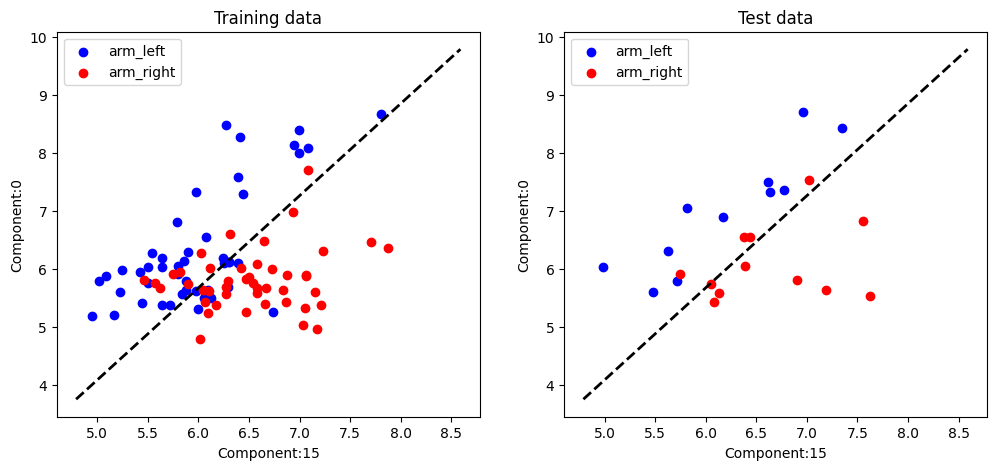

In [16]:
plot_LDA(training_data['train'], training_data['test'], b, W, trainingset.classes, trainingset.selected_csp_components)